In [1]:
import numpy as np
import matplotlib.pylab as p

In [2]:
carga = [0.20, 0.30, 0.31, 0.50, 0.51, 1.01, 1.01, 1.00,2.00,2.01,2.00, 3.01]
taxa = [2.15, 6.80, 21.86, 49.09, 85.45, 115.97, 105.06, 92.07,151.81,141.94,132.59, 142.46]

Text(0, 0.5, 'taxa de disparo (Hz)')

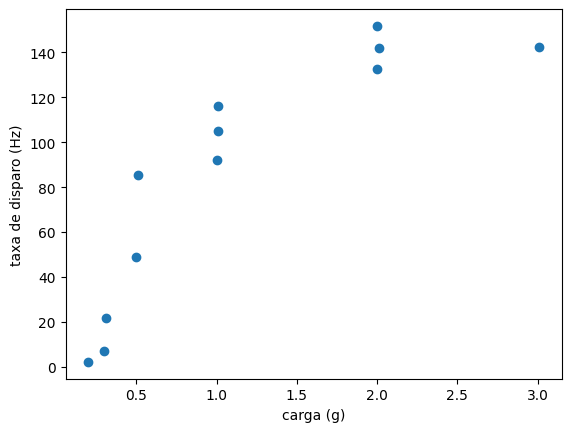

In [3]:
# exercício 0
p.figure(1)
p.plot(carga, taxa, 'o')
p.xlabel('carga (g)')
p.ylabel('taxa de disparo (Hz)')

In [4]:
dados = np.genfromtxt('https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/i_V_pyr1.dat.bz2')

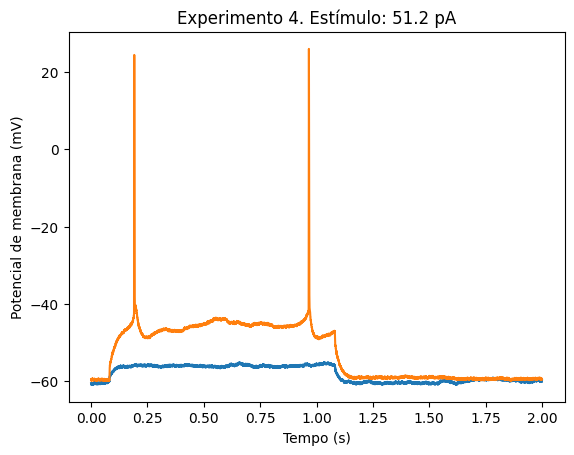

In [5]:
def plota_experimento(dados, qual_exp):
    Vm = dados[qual_exp,1:]
    t = np.arange(len(Vm)) / 10000
    p.plot(t, Vm)
    est = round(dados[qual_exp][0], 2)
    p.title(f'Experimento {qual_exp}. Estímulo: {est} pA')
    p.ylabel('Potencial de membrana (mV)')
    p.xlabel('Tempo (s)')

p.figure()
plota_experimento(dados, 1)
plota_experimento(dados, 4)

In [6]:
def detecta_spikes(dados, limiar=0):
    ''' retorna os índices de `serie` onde `limiar` é cruzado '''
    spikes = []
    for i in range(len(dados) - 1):
        if dados[i] < limiar and dados[i+1] > limiar:
            spikes.append(i)
    return spikes

print(detecta_spikes(dados[4][:]))

[1911, 9656]


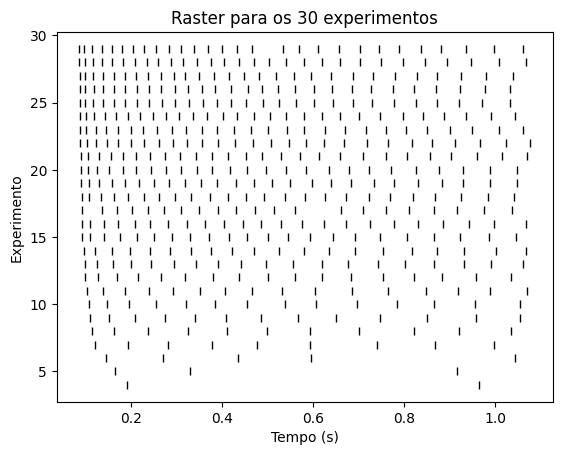

In [7]:
# questão 2

def faz_raster(dados):
    tempo = np.arange(len(dados[0][1:])) / 10000

    for i in range(len(dados)):
        v = dados[i][1:]
        i_spks = detecta_spikes(v)
        p.plot(tempo[i_spks], i * np.ones(len(i_spks)),  '|k')
        p.xlabel('Tempo (s)')
        p.ylabel('Experimento')
        p.title(f'Raster para os {len(dados)} experimentos')

p.figure()
faz_raster(dados)
    


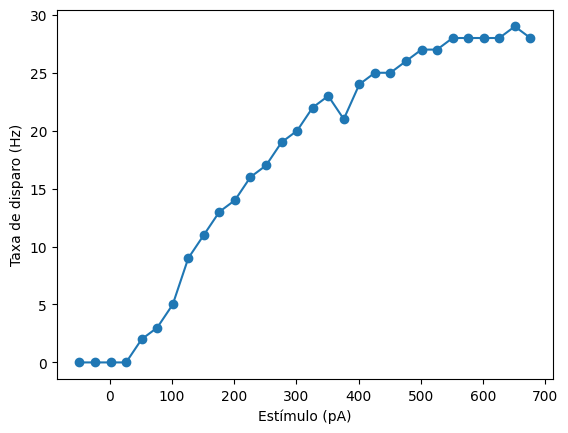

In [8]:
# questão 3

def freq_por_estimulo(dados):
    estimulos = dados[:,0] # todas as linhas, coluna zero
    freqs = [len(detecta_spikes(exp[1:])) for exp in dados]  # lista com no. de spikes por experimento
    p.figure()
    p.plot(estimulos, freqs, 'o-')
    p.xlabel('Estímulo (pA)')
    p.ylabel('Taxa de disparo (Hz)')

freq_por_estimulo(dados)
    

